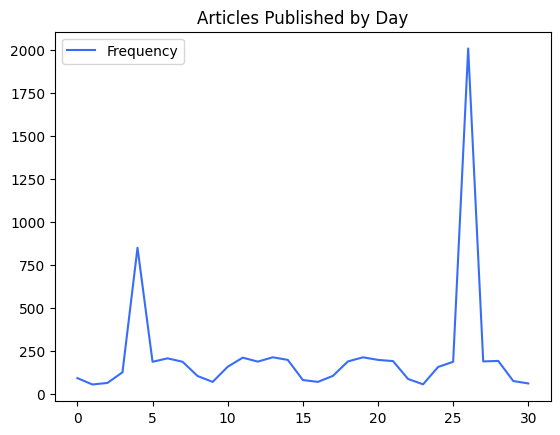

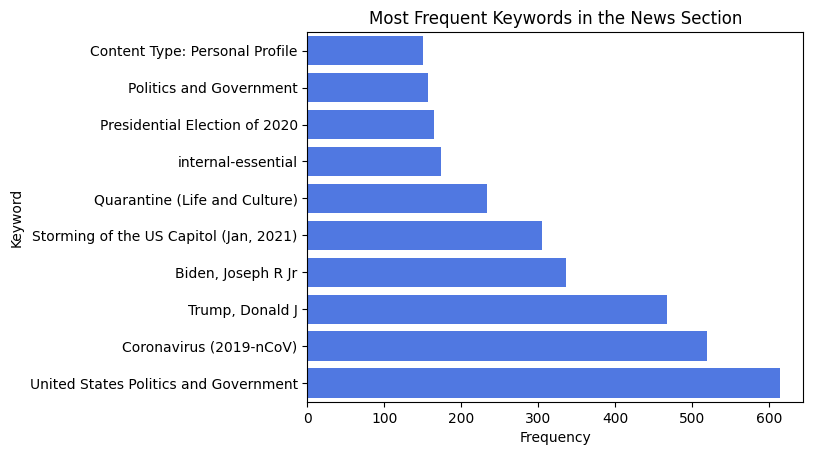

In [16]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def  get_data():
  # Make dictionary to keep track of unique keywords and how many times they've appeared
  news_unique_keywords = dict()

  # Make dictionary to keep track of number of published articles per day
  article_frequency = dict()

  # Fetch API key from file
  api_key = open("API_KEY", "r").read()      

  # GET API call to retrieve January 2023 articles
  # As of right now, time period of dataset is 1 month to avoid downloading 12 months+ worth of article data
  response = requests.get(f"https://api.nytimes.com/svc/archive/v1/2021/1.json?api-key={api_key}")

  # If don't get a successful response code, abort
  if response.status_code != 200:
    return

  # Frequency of words over time ??????????
  for doc in response.json()["response"]["docs"]:
    # Article frequency
    # Note that we split the date by 'T' because we only care about the date, not the time
    if doc["pub_date"].split("T")[0] in article_frequency:
      article_frequency[doc["pub_date"].split("T")[0]] += 1
    else:
      article_frequency[doc["pub_date"].split("T")[0]] = 1

    # Keywords in News Section
    if doc["type_of_material"] != "News":
      continue
    for keyword in doc["keywords"]:
      if keyword["value"] in news_unique_keywords:
        news_unique_keywords[keyword["value"]] += 1
      else:
        news_unique_keywords[keyword["value"]] = 1

  # Sort keywords by frequency then take the last 10 values
  # Also important to keep in mind that in using sorted(), the dictionary is converted into a list of tuples
  top_news_keywords = sorted(news_unique_keywords.items(), key=lambda x:x[1])[-10:]

  return list(article_frequency.values()), top_news_keywords

article_frequency, top_news_keywords = get_data()

sns.set_palette(sns.color_palette("rainbow"))

article_frequency_plot = sns.lineplot(pd.DataFrame(article_frequency, columns = ["Frequency"])).set(title="Articles Published by Day")

# Gotta do this before each new plot to avoid overlap
plt.figure()

top_news_keywords_plot = sns.barplot(pd.DataFrame(top_news_keywords, columns = ["Keyword", "Frequency"]), x="Frequency", y="Keyword").set(title="Most Frequent Keywords in the News Section")